# 랜덤포레스트 (Wine 데이터셋)

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 준비

In [ ]:
# !unzip wine+quality.zip

In [ ]:
df = pd.read_csv('winequality-red.csv', sep = ';') # default는 구분자가 ,이지만 sep으로 ;로 나눈다고 알려줌
df.shape

(1599, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# 칼럼명 정리
df.columns= [col.replace(' ', '_') for col in df.columns]

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### 종속변수 (quality)

In [ ]:
df['quality'].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


<Axes: xlabel='quality', ylabel='count'>

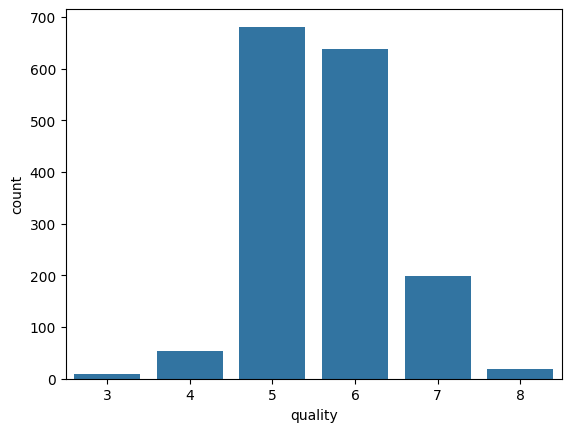

In [ ]:
sns.countplot(x='quality', data=df)

### 타겟 범주 변경
- 3,4 -> low
- 5,6 -> medium
- 7,8 -> high

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# df.loc[(df['quality']==3) |(df['quality']==4), 'quality'] = 'low'

df['quality'] = df['quality'].replace([3,4], 'low')
df['quality'] = df['quality'].replace([5,6], 'medium')
df['quality'] = df['quality'].replace([7,8], 'high')

df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,high
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,high
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,medium


In [ ]:
df['quality'].value_counts().sort_index()

,count
quality,
high,217
low,63
medium,1319


### 결측치 확인

In [ ]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


## 4. 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop('quality', axis=1)
y=df['quality']

x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
type(x_train), type(y_train), type(x_test), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [ ]:
# 넘파이로 변경
x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy()

(array([[7.20e+00, 6.55e-01, 3.00e-02, ..., 3.34e+00, 3.90e-01, 9.50e+00],
        [6.10e+00, 5.90e-01, 1.00e-02, ..., 3.52e+00, 5.60e-01, 1.14e+01],
        [1.07e+01, 4.60e-01, 3.90e-01, ..., 3.18e+00, 6.20e-01, 9.50e+00],
        ...,
        [6.60e+00, 6.10e-01, 1.00e-02, ..., 3.69e+00, 7.30e-01, 1.05e+01],
        [1.16e+01, 2.30e-01, 5.70e-01, ..., 3.14e+00, 7.00e-01, 9.90e+00],
        [8.00e+00, 2.50e-01, 4.30e-01, ..., 3.38e+00, 6.00e-01, 1.19e+01]]),
 array(['medium', 'medium', 'medium', ..., 'medium', 'medium', 'medium'],
       dtype=object),
 array([[ 7.1  ,  0.66 ,  0.   , ...,  3.46 ,  0.54 ,  9.5  ],
        [ 7.1  ,  0.34 ,  0.28 , ...,  3.45 ,  0.48 ,  9.4  ],
        [ 7.6  ,  0.41 ,  0.24 , ...,  3.28 ,  0.59 ,  9.5  ],
        ...,
        [ 7.9  ,  0.885,  0.03 , ...,  3.36 ,  0.33 ,  9.1  ],
        [ 9.3  ,  0.715,  0.24 , ...,  3.12 ,  0.59 ,  9.9  ],
        [ 7.3  ,  0.67 ,  0.02 , ...,  3.32 ,  0.68 , 11.1  ]]),
 array(['medium', 'medium', 'medium', 'high', 

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [ ]:
y_train.value_counts()

,count
quality,
medium,1055
high,174
low,50


In [ ]:
# !pip list

In [ ]:
from imblearn.over_sampling import SMOTE # 오버샘플링

smote = SMOTE(random_state=42)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
y_train_over.value_counts() # 데이터 개수 불균형 -> 오버샘플링으로 해결

,count
quality,
medium,1055
high,1055
low,1055


In [ ]:
x_train.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1348,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4
329,10.7,0.460,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
47,8.7,0.290,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5
820,7.0,0.685,0.00,1.9,0.099,9.0,22.0,0.99606,3.34,0.60,9.7
1408,8.1,0.290,0.36,2.2,0.048,35.0,53.0,0.99500,3.27,1.01,12.4
123,8.0,0.710,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
607,8.8,0.480,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5


## 5. 학습

### 베이스 모델

In [ ]:
x_train_over.to_numpy(), y_train_over.to_numpy()

(array([[7.20000000e+00, 6.55000000e-01, 3.00000000e-02, ...,
         3.34000000e+00, 3.90000000e-01, 9.50000000e+00],
        [6.10000000e+00, 5.90000000e-01, 1.00000000e-02, ...,
         3.52000000e+00, 5.60000000e-01, 1.14000000e+01],
        [1.07000000e+01, 4.60000000e-01, 3.90000000e-01, ...,
         3.18000000e+00, 6.20000000e-01, 9.50000000e+00],
        ...,
        [8.15836750e+00, 8.24278794e-01, 7.00409963e-02, ...,
         3.54357809e+00, 6.90816252e-01, 9.91673499e+00],
        [7.58336684e+00, 1.43113321e+00, 1.16432125e-02, ...,
         3.48004021e+00, 4.24949741e-01, 1.09000000e+01],
        [7.43826482e+00, 1.15821462e+00, 3.82648243e-02, ...,
         3.59556166e+00, 5.62958895e-01, 1.08913241e+01]]),
 array(['medium', 'medium', 'medium', ..., 'low', 'low', 'low'],
       dtype=object))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, random_state=42)
rf.fit(x_train_over, y_train_over)

RandomForestClassifier(random_state=42)

## 6. 테스트

In [ ]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_pred = rf.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'high', 'medium', 'medium', 'high', 'medium', 'medium',
       'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium',
       'medium', 'high', 'medium', 'high', 'high', 'high', 'medium',
       'medium', 'medium', 'medium', 'medium', 'high', 'high', 'high',
       'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium',
       'medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium',
       'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',
       'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'high',
       'medium', 'medium', 'medium', 'low', 'medium', 'high', 'high',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium'

## 7. 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.8250, prec: 0.5543, recall: 0.5833, f1: 0.5640


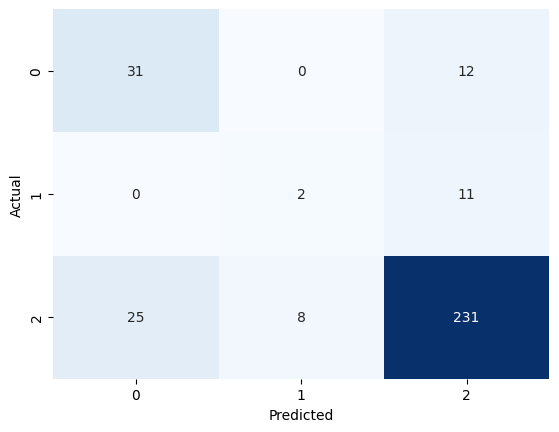

In [ ]:
print_metrics(y_test, y_pred)

### 중요 변수

In [ ]:
x_train_over.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
rf.feature_importances_

array([0.05621041, 0.15847182, 0.07899871, 0.05238755, 0.06226988,
       0.06701952, 0.09099885, 0.05312093, 0.07869903, 0.14561123,
       0.15621207])

In [ ]:
importtance = pd.DataFrame(rf.feature_importances_, index=x_train_over.columns)
importtance.sort_values(by=0, ascending=False)

,0
volatile_acidity,0.158472
alcohol,0.156212
sulphates,0.145611
total_sulfur_dioxide,0.090999
citric_acid,0.078999
pH,0.078699
free_sulfur_dioxide,0.067020
chlorides,0.062270
fixed_acidity,0.056210
density,0.053121


# 다른 모델 학습시키기

In [ ]:
x_train_over, y_train_over
x_test, y_test

- 학습, 테스트 데이터 분리
- 스케일링, 인코딩
- SVC 학습
- 테스트 -> 평가


### x,y 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop('quality', axis=1)
y=df['quality']

x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [ ]:
x_train.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
y_train.isna().sum()

0

In [ ]:
y_train.value_counts()

,count
quality,
medium,1055
high,174
low,50


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_train_e

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
le.classes_

array(['high', 'low', 'medium'], dtype=object)

### 베이스 모델

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(x_train_scaled, y_train_e)

SVC(random_state=42)

In [ ]:
y_pred = svc.predict(x_test_scaled)
y_pred

array([2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

### 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

### 테스트 데이터 인코딩

In [ ]:
y_test_e = le.transform(y_test)  # Transform

acc: 0.8438, prec: 0.4985, recall: 0.4318, f1: 0.4473


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


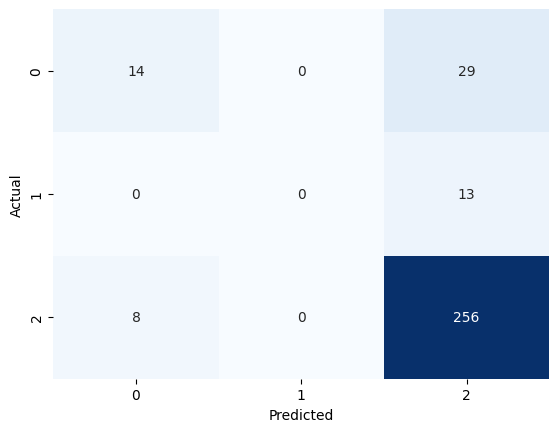

In [ ]:
print_metrics(y_test_e, y_pred)